In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.max_columns', None)

#### 1. Data Gatherting

In [2]:
ad_opt = pd.read_csv('digital_marketing_roi_dataset.csv')
ad_opt.head()

,Campaign_ID,Spend,Impressions,Clicks,Conversions,Campaign_Type,Region,Device_Type,Month,CTR,Conversion_Rate,CPC,CPM,CPA,Revenue,ROI
0,6065,1267.852332,17642.0,3262.0,118.0,Display,Canada,Desktop,5,0.184900,0.036174,0.388673,71.865567,10.744511,16442.912417,11.969107
1,17215,3503.649208,15837.0,297.0,223.0,Email,India,Desktop,11,0.018754,0.750842,11.796799,221.231875,15.711431,36318.018142,9.365769
2,9542,1795.152638,98219.0,1023.0,429.0,Display,India,Mobile,2,0.010416,0.419355,1.754792,18.277040,4.184505,54813.630280,29.534245
3,15636,227.683641,12849.0,3397.0,112.0,Meta Ads,UK,Mobile,9,0.264379,0.032970,0.067025,17.719950,2.032890,8605.263792,36.794827
4,18487,1005.997237,66945.0,4202.0,44.0,LinkedIn,Canada,Tablet,2,0.062768,0.010471,0.239409,15.027220,22.863573,5996.434087,4.960686


In [3]:
ad_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      20100 non-null  int64  
 1   Spend            19900 non-null  float64
 2   Impressions      19899 non-null  float64
 3   Clicks           19900 non-null  float64
 4   Conversions      19900 non-null  float64
 5   Campaign_Type    20100 non-null  object 
 6   Region           20100 non-null  object 
 7   Device_Type      20100 non-null  object 
 8   Month            20100 non-null  int64  
 9   CTR              20100 non-null  float64
 10  Conversion_Rate  20100 non-null  float64
 11  CPC              20100 non-null  float64
 12  CPM              20100 non-null  float64
 13  CPA              20100 non-null  float64
 14  Revenue          19899 non-null  float64
 15  ROI              20100 non-null  float64
dtypes: float64(11), int64(2), object(3)
memory usage: 2.5+ MB


### 2. Train Test Split

In [4]:
x = ad_opt.drop("ROI", axis =1)
y =ad_opt["ROI"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
x_train

,Campaign_ID,Spend,Impressions,Clicks,Conversions,Campaign_Type,Region,Device_Type,Month,CTR,Conversion_Rate,CPC,CPM,CPA,Revenue
3479,3220,3688.765140,16220.0,899.0,290.0,LinkedIn,UK,Desktop,1,0.055425,0.322581,4.103187,227.420785,12.719880,31337.691517
12264,14656,4196.952744,81280.0,2704.0,396.0,Display,Australia,Tablet,8,0.033268,0.146450,1.552127,51.635738,10.598365,38815.860051
7070,12252,3914.909825,16231.0,4265.0,434.0,Google Search,India,Tablet,8,0.262769,0.101758,0.917916,241.199546,9.020530,17393.172671
720,11340,2077.261556,13099.0,2252.0,406.0,Meta Ads,US,Mobile,3,0.171922,0.180284,0.922407,158.581690,5.116408,8675.941277
11883,12662,3056.128402,73623.0,2139.0,201.0,Display,US,Tablet,12,0.029053,0.093969,1.428765,41.510512,15.204619,21826.072264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,13832,770.713566,28993.0,643.0,72.0,LinkedIn,India,Desktop,5,0.022178,0.111975,1.198621,26.582746,10.704355,10239.559249
11964,11318,2329.305555,50269.0,1909.0,431.0,LinkedIn,Canada,Mobile,11,0.037976,0.225773,1.220171,46.336819,5.404421,51655.447168
5390,6307,1943.333297,27173.0,4874.0,80.0,Google Search,Canada,Tablet,12,0.179369,0.016414,0.398714,71.517068,24.291666,4237.287090
860,4154,1847.321262,12621.0,3776.0,80.0,Google Search,UK,Tablet,1,0.299184,0.021186,0.489227,146.368851,23.091515,2870.068955


In [6]:
y_train

3479      7.495442
12264     8.248582
7070      3.442803
720       3.176624
11883     6.141739
           ...    
11284    12.285817
11964    21.176329
5390      1.180422
860       0.553638
15795    99.209473
Name: ROI, Length: 16080, dtype: float64

In [7]:
x_test

,Campaign_ID,Spend,Impressions,Clicks,Conversions,Campaign_Type,Region,Device_Type,Month,CTR,Conversion_Rate,CPC,CPM,CPA,Revenue
11866,17732,3034.936518,62248.0,853.0,36.0,LinkedIn,Australia,Desktop,7,0.013703,0.042204,3.557956,48.755567,84.303790,3584.222532
3043,10635,1883.734599,82254.0,2999.0,74.0,Meta Ads,Australia,Tablet,5,0.036460,0.024675,0.628121,22.901435,25.455873,6146.806247
5456,10240,1445.404346,46684.0,4246.0,451.0,Display,Canada,Mobile,5,0.090952,0.106218,0.340416,30.961450,3.204888,13762.716247
2405,157,3393.464182,98292.0,2108.0,153.0,LinkedIn,Canada,Tablet,8,0.021446,0.072581,1.609803,34.524317,22.179504,28572.737942
15567,3712,3608.644869,10334.0,4994.0,285.0,Meta Ads,India,Desktop,3,0.483259,0.057068,0.722596,349.201168,12.661912,24768.555705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17858,17632,2534.699219,77170.0,1884.0,476.0,Display,Australia,Desktop,12,0.024414,0.252654,1.345382,32.845655,5.324998,91917.288515
2522,3597,1226.150956,69682.0,2591.0,98.0,LinkedIn,Australia,Desktop,12,0.037183,0.037823,0.473235,17.596380,12.511744,5589.631311
13563,19858,4228.382551,84845.0,2141.0,425.0,Google Search,India,Tablet,4,0.025234,0.198505,1.974957,49.836555,9.949135,68114.698855
15502,13731,1767.103683,23859.0,273.0,133.0,Email,UK,Desktop,8,0.011442,0.487179,6.472907,74.064449,13.286494,12551.310206


In [8]:
y_test

11866     0.180988
3043      2.263096
5456      8.521707
2405      7.419932
15567     5.863672
           ...    
17858    35.263588
2522      3.558681
13563    15.108925
15502     6.102758
518      12.808717
Name: ROI, Length: 4020, dtype: float64

In [9]:
x_train.shape



(16080, 15)

In [10]:
y_train.shape

(16080,)

### 3. EDA

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16080 entries, 3479 to 15795
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      16080 non-null  int64  
 1   Spend            15913 non-null  float64
 2   Impressions      15915 non-null  float64
 3   Clicks           15912 non-null  float64
 4   Conversions      15920 non-null  float64
 5   Campaign_Type    16080 non-null  object 
 6   Region           16080 non-null  object 
 7   Device_Type      16080 non-null  object 
 8   Month            16080 non-null  int64  
 9   CTR              16080 non-null  float64
 10  Conversion_Rate  16080 non-null  float64
 11  CPC              16080 non-null  float64
 12  CPM              16080 non-null  float64
 13  CPA              16080 non-null  float64
 14  Revenue          15922 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 2.0+ MB


In [12]:
# x_train.duplicated().sum()

In [13]:
# x_train.drop_duplicates(inplace = True)

In [14]:
# x_train.duplicated().sum()

In [15]:
x_train.isna().sum()

Campaign_ID          0
Spend              167
Impressions        165
Clicks             168
Conversions        160
Campaign_Type        0
Region               0
Device_Type          0
Month                0
CTR                  0
Conversion_Rate      0
CPC                  0
CPM                  0
CPA                  0
Revenue            158
dtype: int64

In [16]:
numeric_cols = ["Spend", "Impressions", "Clicks", "Conversions", "Revenue"]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer only on numeric columns
x_train[numeric_cols] = imputer.fit_transform(x_train[numeric_cols])


In [17]:
x_train.isna().sum()

Campaign_ID        0
Spend              0
Impressions        0
Clicks             0
Conversions        0
Campaign_Type      0
Region             0
Device_Type        0
Month              0
CTR                0
Conversion_Rate    0
CPC                0
CPM                0
CPA                0
Revenue            0
dtype: int64

In [18]:
# x_test.drop_duplicates(inplace = True)

In [19]:
numeric_cols = ["Spend", "Impressions", "Clicks", "Conversions", "Revenue"]

imputer = KNNImputer(n_neighbors=5)

x_test[numeric_cols] = imputer.fit_transform(x_test[numeric_cols])


#### 1. Campaign_ID 

In [20]:
x_train["Campaign_ID"]

3479      3220
12264    14656
7070     12252
720      11340
11883    12662
         ...  
11284    13832
11964    11318
5390      6307
860       4154
15795     4651
Name: Campaign_ID, Length: 16080, dtype: int64

In [21]:
x_train.drop(columns= ['Campaign_ID'], inplace= True)

#### 2. Spend

In [22]:
x_train['Spend']

3479     3688.765140
12264    4196.952744
7070     3914.909825
720      2077.261556
11883    3056.128402
            ...     
11284     770.713566
11964    2329.305555
5390     1943.333297
860      1847.321262
15795     362.810478
Name: Spend, Length: 16080, dtype: float64

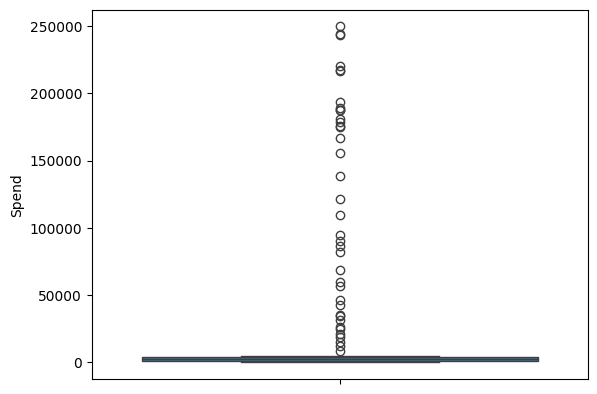

In [23]:
sns.boxplot(x_train['Spend'])
plt.show()

In [24]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['Spend'] = impute_outliers(x_train['Spend'])


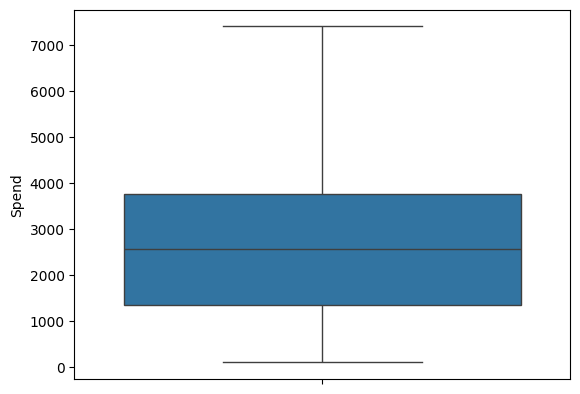

In [25]:
sns.boxplot(x_train['Spend'])
plt.show()

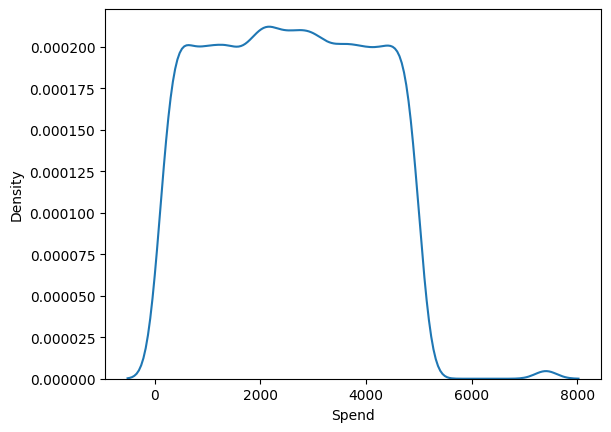

In [26]:
sns.kdeplot(x_train['Spend'])
plt.show()

In [27]:
x_train['Impressions']

3479     16220.0
12264    81280.0
7070     16231.0
720      13099.0
11883    73623.0
          ...   
11284    28993.0
11964    50269.0
5390     27173.0
860      12621.0
15795    19731.0
Name: Impressions, Length: 16080, dtype: float64

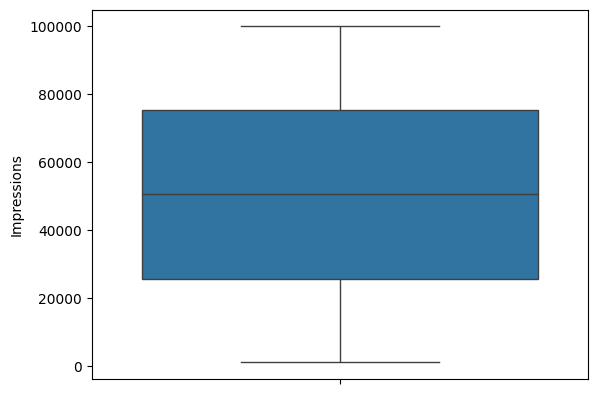

In [28]:
sns.boxplot(x_train['Impressions'])
plt.show()

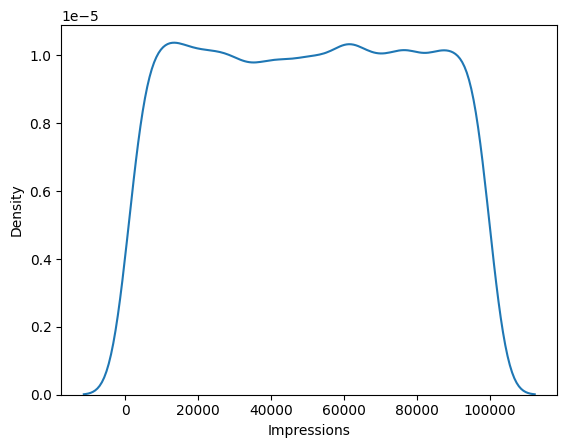

In [29]:
sns.kdeplot(x_train['Impressions'])
plt.show()

In [30]:
x_train['Clicks']

3479      899.0
12264    2704.0
7070     4265.0
720      2252.0
11883    2139.0
          ...  
11284     643.0
11964    1909.0
5390     4874.0
860      3776.0
15795    4341.0
Name: Clicks, Length: 16080, dtype: float64

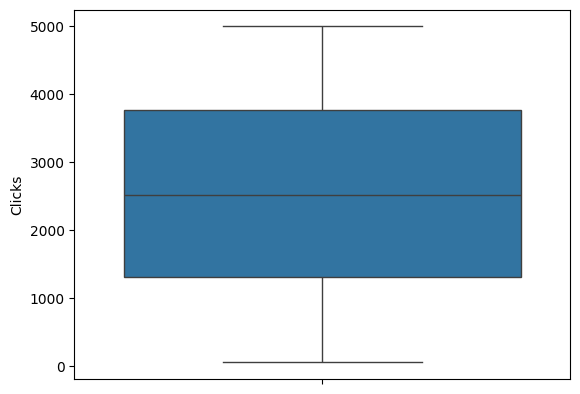

In [31]:
sns.boxplot(x_train['Clicks'])
plt.show()

In [32]:
x_train['Conversions']

3479     290.0
12264    396.0
7070     434.0
720      406.0
11883    201.0
         ...  
11284     72.0
11964    431.0
5390      80.0
860       80.0
15795    468.0
Name: Conversions, Length: 16080, dtype: float64

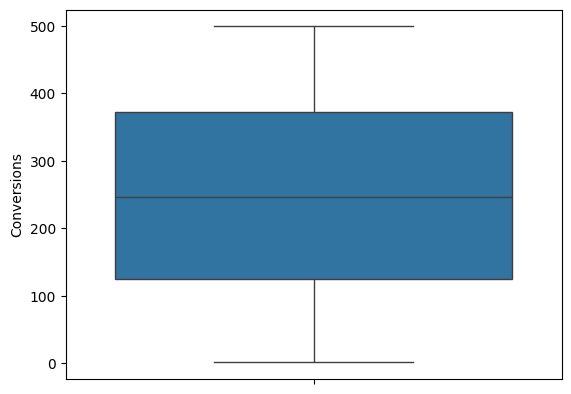

In [33]:
sns.boxplot(x_train['Conversions'])
plt.show()

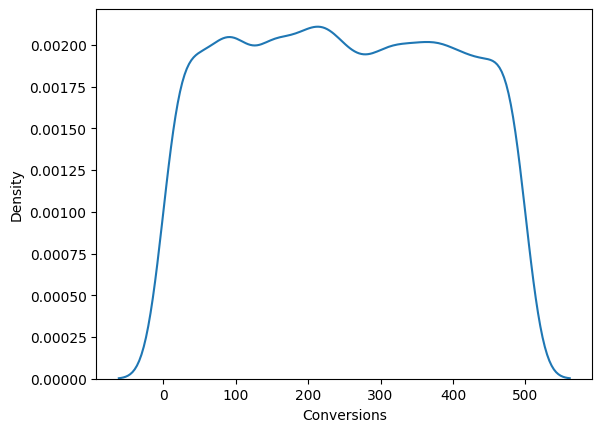

In [34]:
sns.kdeplot(x_train['Conversions'])
plt.show()

In [35]:
x_train['Campaign_Type']

3479          LinkedIn
12264          Display
7070     Google Search
720           Meta Ads
11883          Display
             ...      
11284         LinkedIn
11964         LinkedIn
5390     Google Search
860      Google Search
15795            Email
Name: Campaign_Type, Length: 16080, dtype: object

In [36]:
x_train['Campaign_Type'].value_counts()

Campaign_Type
Google Search    3286
Display          3244
Meta Ads         3218
LinkedIn         3204
Email            3128
Name: count, dtype: int64

In [37]:
# dummies = pd.get_dummies(x_train['Campaign_Type'], prefix='Campaign', dtype=int, drop_first=True)
# x_train = pd.concat([x_train.drop('Campaign_Type', axis=1), dummies], axis=1)
campaign = {
    'LinkedIn':0,
    'Meta Ads':1, 
    'Display':2, 
    'Google Search':3, 
    'Email':4
}

x_train['Campaign_Type']=x_train['Campaign_Type'].map(campaign)

In [38]:
x_train['Campaign_Type'].unique()

array([0, 2, 3, 1, 4])

In [39]:
x_train

,Spend,Impressions,Clicks,Conversions,Campaign_Type,Region,Device_Type,Month,CTR,Conversion_Rate,CPC,CPM,CPA,Revenue
3479,3688.765140,16220.0,899.0,290.0,0,UK,Desktop,1,0.055425,0.322581,4.103187,227.420785,12.719880,31337.691517
12264,4196.952744,81280.0,2704.0,396.0,2,Australia,Tablet,8,0.033268,0.146450,1.552127,51.635738,10.598365,38815.860051
7070,3914.909825,16231.0,4265.0,434.0,3,India,Tablet,8,0.262769,0.101758,0.917916,241.199546,9.020530,17393.172671
720,2077.261556,13099.0,2252.0,406.0,1,US,Mobile,3,0.171922,0.180284,0.922407,158.581690,5.116408,8675.941277
11883,3056.128402,73623.0,2139.0,201.0,2,US,Tablet,12,0.029053,0.093969,1.428765,41.510512,15.204619,21826.072264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,770.713566,28993.0,643.0,72.0,0,India,Desktop,5,0.022178,0.111975,1.198621,26.582746,10.704355,10239.559249
11964,2329.305555,50269.0,1909.0,431.0,0,Canada,Mobile,11,0.037976,0.225773,1.220171,46.336819,5.404421,51655.447168
5390,1943.333297,27173.0,4874.0,80.0,3,Canada,Tablet,12,0.179369,0.016414,0.398714,71.517068,24.291666,4237.287090
860,1847.321262,12621.0,3776.0,80.0,3,UK,Tablet,1,0.299184,0.021186,0.489227,146.368851,23.091515,2870.068955


In [40]:
x_train['Region']

3479            UK
12264    Australia
7070         India
720             US
11883           US
           ...    
11284        India
11964       Canada
5390        Canada
860             UK
15795           UK
Name: Region, Length: 16080, dtype: object

In [41]:
x_train['Region'].value_counts()

Region
Australia    3296
Canada       3268
UK           3189
India        3180
US           3147
Name: count, dtype: int64

In [42]:
x_train.drop(columns=["Region"], inplace=True)

In [43]:
x_train['Device_Type']

3479     Desktop
12264     Tablet
7070      Tablet
720       Mobile
11883     Tablet
          ...   
11284    Desktop
11964     Mobile
5390      Tablet
860       Tablet
15795     Tablet
Name: Device_Type, Length: 16080, dtype: object

In [44]:
x_train['Device_Type'].value_counts()

Device_Type
Mobile     5375
Desktop    5356
Tablet     5349
Name: count, dtype: int64

In [45]:
x_train['Device_Type'].unique()

array(['Desktop', 'Tablet', 'Mobile'], dtype=object)

In [46]:
dev={
    'Desktop':0, 
    'Tablet':1,
    'Mobile':2
}

x_train['Device_Type'] = x_train['Device_Type'].map(dev)

In [47]:
x_train['Device_Type']

3479     0
12264    1
7070     1
720      2
11883    1
        ..
11284    0
11964    2
5390     1
860      1
15795    1
Name: Device_Type, Length: 16080, dtype: int64

In [48]:
x_train['Month']

3479      1
12264     8
7070      8
720       3
11883    12
         ..
11284     5
11964    11
5390     12
860       1
15795    11
Name: Month, Length: 16080, dtype: int64

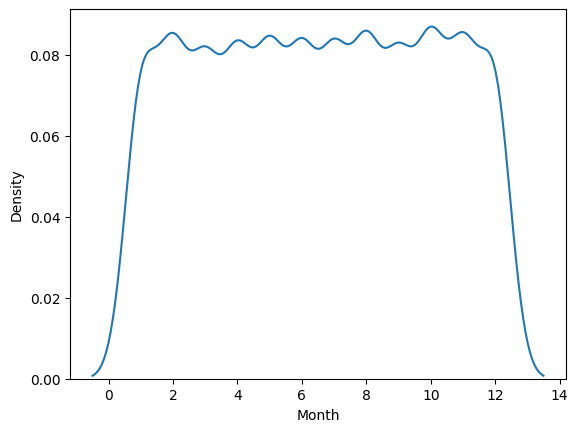

In [49]:
sns.kdeplot(x_train['Month'])
plt.show()

In [50]:
x_train['CTR']

3479     0.055425
12264    0.033268
7070     0.262769
720      0.171922
11883    0.029053
           ...   
11284    0.022178
11964    0.037976
5390     0.179369
860      0.299184
15795    0.220009
Name: CTR, Length: 16080, dtype: float64

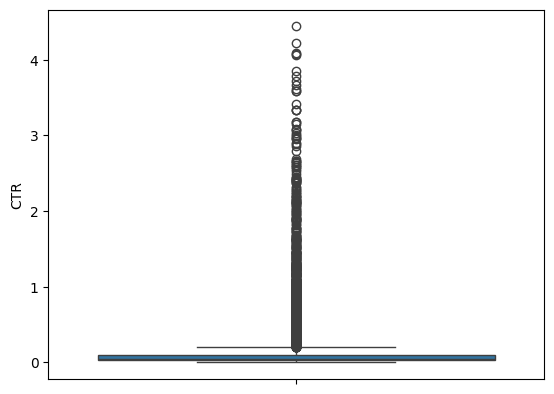

In [51]:
sns.boxplot(x_train['CTR'])
plt.show()

In [52]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['CTR'] = impute_outliers(x_train['CTR'])


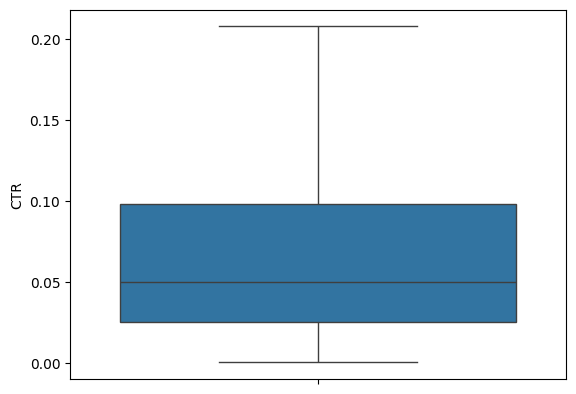

In [53]:
sns.boxplot(x_train['CTR'])
plt.show()

In [54]:
x_train['Conversion_Rate']

3479     0.322581
12264    0.146450
7070     0.101758
720      0.180284
11883    0.093969
           ...   
11284    0.111975
11964    0.225773
5390     0.016414
860      0.021186
15795    0.107809
Name: Conversion_Rate, Length: 16080, dtype: float64

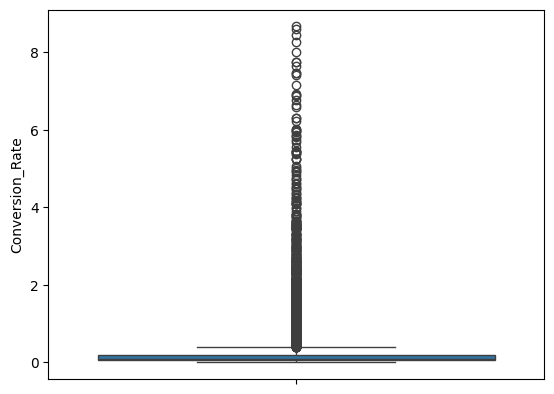

In [55]:
sns.boxplot(x_train['Conversion_Rate'])
plt.show()

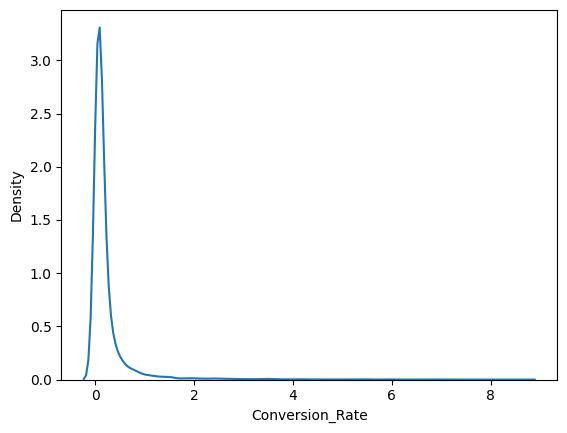

In [56]:
sns.kdeplot(x_train['Conversion_Rate'])
plt.show()

In [57]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['Conversion_Rate'] = impute_outliers(x_train['Conversion_Rate'])


In [58]:
x_train['CPC']

3479     4.103187
12264    1.552127
7070     0.917916
720      0.922407
11883    1.428765
           ...   
11284    1.198621
11964    1.220171
5390     0.398714
860      0.489227
15795    0.083578
Name: CPC, Length: 16080, dtype: float64

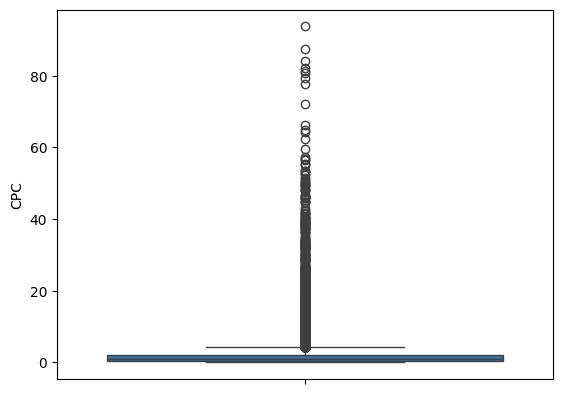

In [59]:
sns.boxplot(x_train['CPC'])
plt.show()

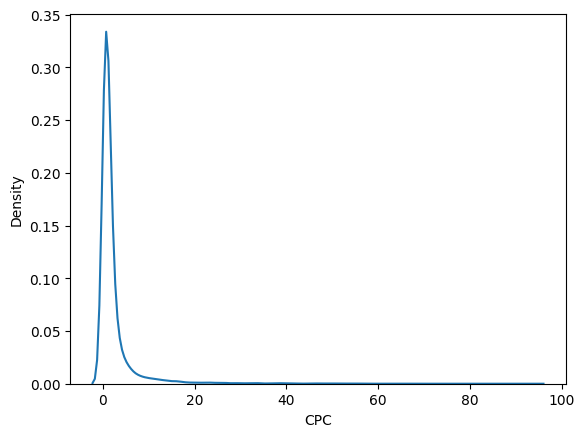

In [60]:
sns.kdeplot(x_train['CPC'])
plt.show()

In [61]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['CPC'] = impute_outliers(x_train['CPC'])


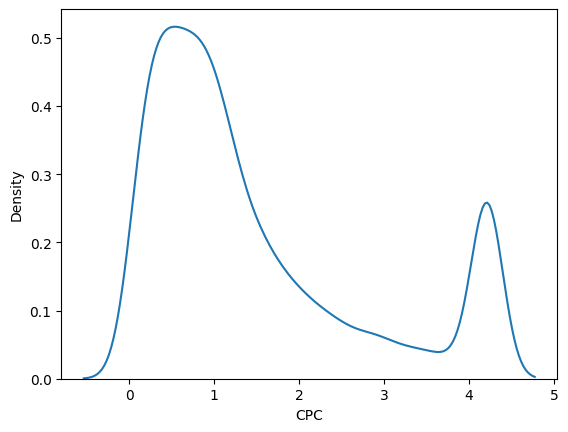

In [62]:
sns.kdeplot(x_train['CPC'])
plt.show()

In [63]:
x_train['CPM']

3479     227.420785
12264     51.635738
7070     241.199546
720      158.581690
11883     41.510512
            ...    
11284     26.582746
11964     46.336819
5390      71.517068
860      146.368851
15795     18.387840
Name: CPM, Length: 16080, dtype: float64

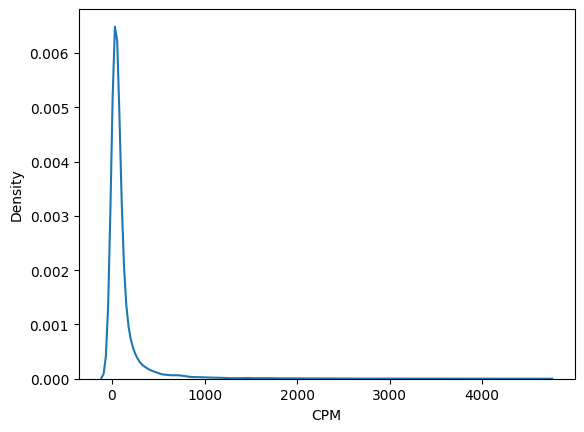

In [64]:
sns.kdeplot(x_train['CPM'])
plt.show()


In [65]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['CPM'] = impute_outliers(x_train['CPM'])


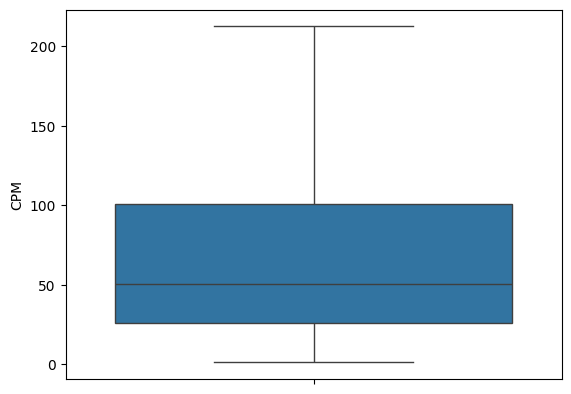

In [66]:
sns.boxplot(x_train['CPM'])
plt.show()

In [67]:
x_train['CPA']

3479     12.719880
12264    10.598365
7070      9.020530
720       5.116408
11883    15.204619
           ...    
11284    10.704355
11964     5.404421
5390     24.291666
860      23.091515
15795     0.775236
Name: CPA, Length: 16080, dtype: float64

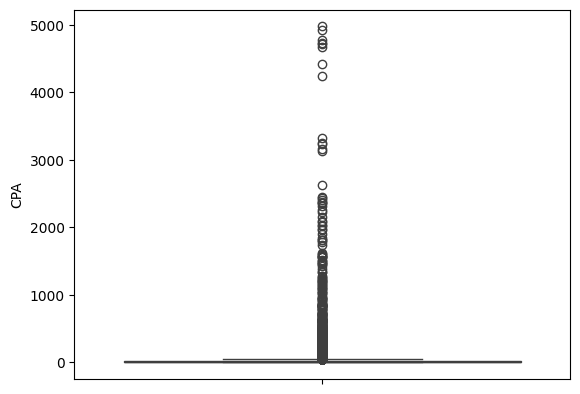

In [68]:
sns.boxplot(x_train['CPA'])
plt.show()

In [69]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['CPA'] = impute_outliers(x_train['CPA'])


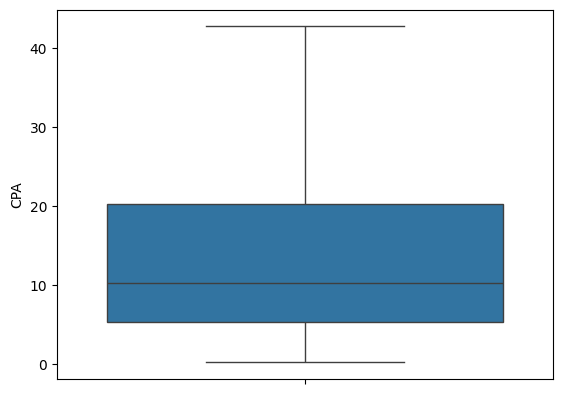

In [70]:
sns.boxplot(x_train['CPA'])
plt.show()

In [71]:
x_train['Revenue']

3479     31337.691517
12264    38815.860051
7070     17393.172671
720       8675.941277
11883    21826.072264
             ...     
11284    10239.559249
11964    51655.447168
5390      4237.287090
860       2870.068955
15795    36357.046995
Name: Revenue, Length: 16080, dtype: float64

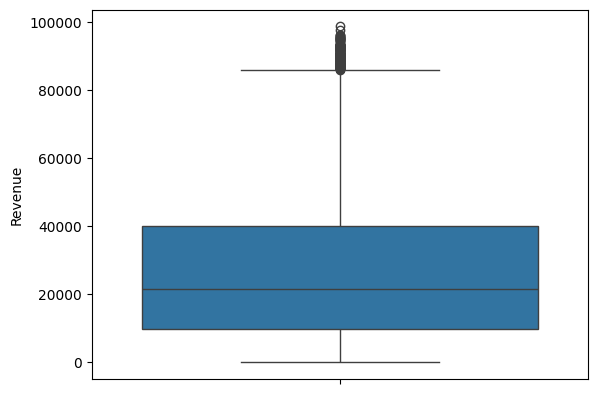

In [72]:
sns.boxplot(x_train['Revenue'])
plt.show()

In [73]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_train['Revenue'] = impute_outliers(x_train['Revenue'])

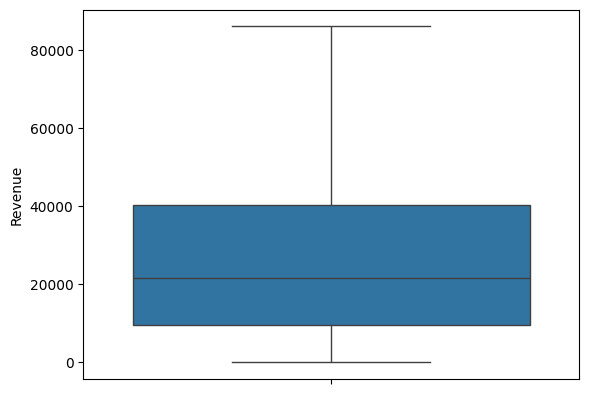

In [74]:
sns.boxplot(x_train['Revenue'])
plt.show()

In [75]:
x_test.drop(columns= ['Campaign_ID'], inplace= True)

In [76]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['Spend'] = impute_outliers(x_test['Spend'])


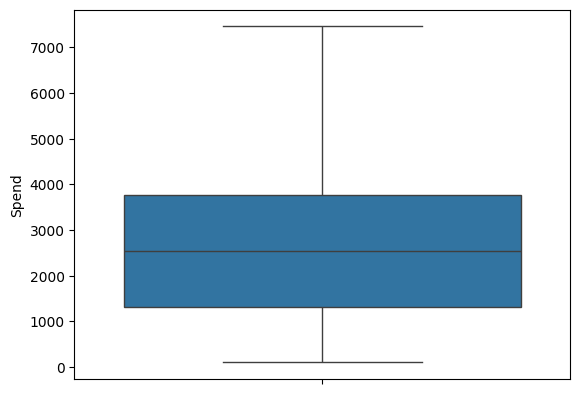

In [77]:
sns.boxplot(x_test['Spend'])
plt.show()

In [78]:
# dummies = pd.get_dummies(x_test['Campaign_Type'], prefix='Campaign', dtype=int, drop_first=True)
# x_test = pd.concat([x_test.drop('Campaign_Type', axis=1), dummies], axis=1)


campaign = {
    'LinkedIn':0,
    'Meta Ads':1, 
    'Display':2, 
    'Google Search':3, 
    'Email':4
}

x_test['Campaign_Type']=x_test['Campaign_Type'].map(campaign)

In [79]:
x_test['Campaign_Type'].unique()

array([0, 1, 2, 3, 4])

In [80]:
x_test.drop(columns=["Region"], inplace=True)

In [81]:
dev={
    'Desktop':0, 
    'Tablet':1,
    'Mobile':2
}

x_test['Device_Type'] = x_test['Device_Type'].map(dev)

In [82]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['CTR'] = impute_outliers(x_test['CTR'])


In [83]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['Conversion_Rate'] = impute_outliers(x_test['Conversion_Rate'])


In [84]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['CPC'] = impute_outliers(x_test['CPC'])


In [85]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['CPM'] = impute_outliers(x_test['CPM'])


In [86]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['CPA'] = impute_outliers(x_test['CPA'])


In [87]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
x_test['Revenue'] = impute_outliers(x_test['Revenue'])

In [88]:
y_train

3479      7.495442
12264     8.248582
7070      3.442803
720       3.176624
11883     6.141739
           ...    
11284    12.285817
11964    21.176329
5390      1.180422
860       0.553638
15795    99.209473
Name: ROI, Length: 16080, dtype: float64

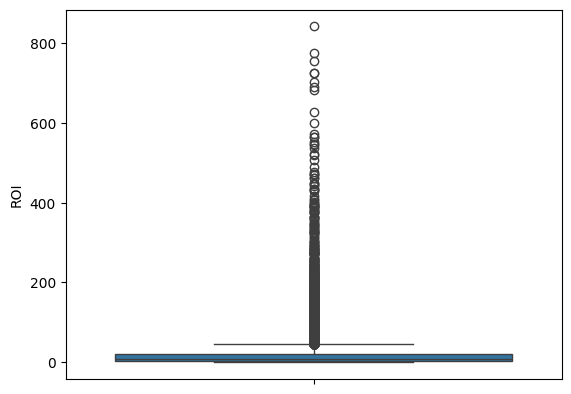

In [89]:
sns.boxplot(y_train)
plt.show()

In [90]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
y_train = impute_outliers(y_train)

In [91]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Cap values
    feature = feature.clip(lower=lower_tail, upper=upper_tail)
    return feature

# Apply back to your column
y_test = impute_outliers(y_test)

In [92]:
corr = x_train.corr()
corr

,Spend,Impressions,Clicks,Conversions,Campaign_Type,Device_Type,Month,CTR,Conversion_Rate,CPC,CPM,CPA,Revenue
Spend,1.000000,-0.005480,-0.002069,0.009830,0.012311,0.008654,-0.005870,0.004046,0.005147,0.483286,0.480438,0.467691,0.014113
Impressions,-0.005480,1.000000,0.000834,-0.008922,0.002238,0.006827,0.002727,-0.718354,-0.003222,-0.004021,-0.729654,0.001474,0.005867
Clicks,-0.002069,0.000834,1.000000,-0.001627,0.000547,-0.002948,0.000748,0.502844,-0.708243,-0.726552,0.003213,-0.006323,-0.004292
Conversions,0.009830,-0.008922,-0.001627,1.000000,-0.007351,0.000544,-0.006593,0.006650,0.518669,0.001068,0.003581,-0.731303,0.726447
Campaign_Type,0.012311,0.002238,0.000547,-0.007351,1.000000,0.002116,-0.009565,-0.003713,-0.007876,0.010073,0.007600,0.009828,0.000576
Device_Type,0.008654,0.006827,-0.002948,0.000544,0.002116,1.000000,-0.008318,-0.006125,-0.003164,0.000231,-0.000654,-0.002246,0.008323
Month,-0.005870,0.002727,0.000748,-0.006593,-0.009565,-0.008318,1.000000,-0.003771,-0.000720,0.000254,-0.008985,0.003972,-0.009374
CTR,0.004046,-0.718354,0.502844,0.006650,-0.003713,-0.006125,-0.003771,1.000000,-0.382069,-0.390992,0.650110,-0.004637,-0.007541
Conversion_Rate,0.005147,-0.003222,-0.708243,0.518669,-0.007876,-0.003164,-0.000720,-0.382069,1.000000,0.634217,-0.002110,-0.403608,0.379043
CPC,0.483286,-0.004021,-0.726552,0.001068,0.010073,0.000231,0.000254,-0.390992,0.634217,1.000000,0.247214,0.249906,0.009321


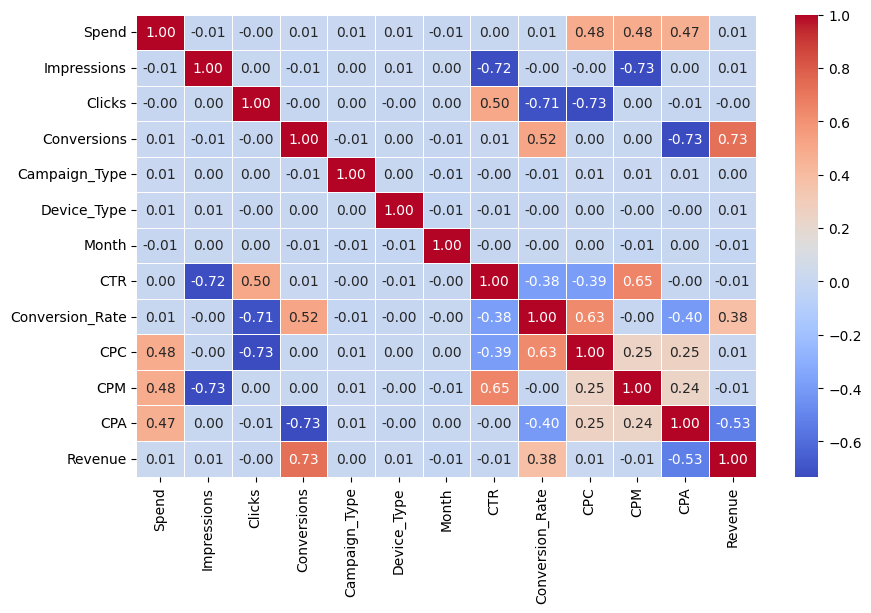

In [93]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

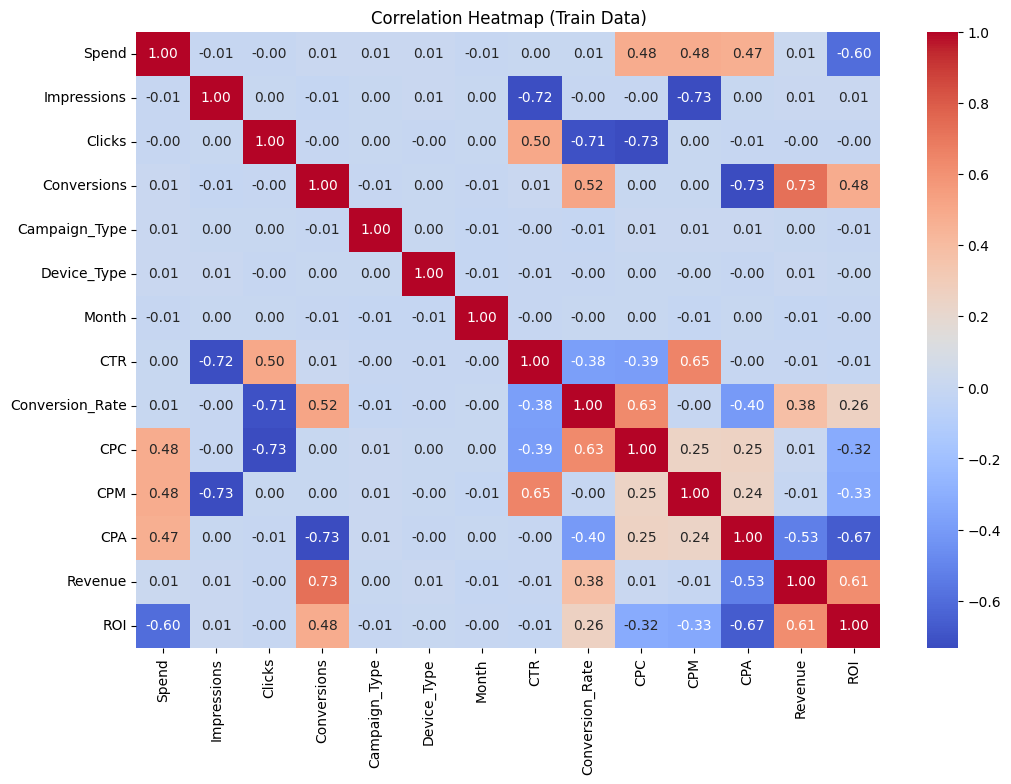

In [94]:
train_x_train = x_train.copy()
train_x_train['ROI'] = y_train

# Compute correlation matrixa
corr_matrix = train_x_train.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Train Data)")
plt.show()

In [117]:

x_train = x_train.drop(columns=['Spend', 'Impressions', 'Clicks', 'Conversions', 
       'CTR', 'Conversion_Rate', 'CPC', 'CPM'])

x_test = x_test.drop(columns=['Spend', 'Impressions', 'Clicks', 'Conversions', 
       'CTR', 'Conversion_Rate', 'CPC', 'CPM'])



In [118]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x_train, y_train)

LinearRegression()

In [98]:
# y_test = y_test.values.ravel()

In [99]:
# y_test = y_test.reset_index(drop=True)
# y_pred = lr.predict(x_test)

In [100]:
# x_test = x_test.dropna()
# test_df = pd.concat([x_test, pd.Series(y_test, name="target")], axis=1).dropna()

# x_test = test_df.drop(columns=["target"])
# y_test = test_df["target"]

# # Predict again
# y_pred = lr.predict(x_test)

In [119]:
# y_pred = lr.predict(x_test)

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error :', mse)

# rmse = np.sqrt(mse)
# print('Root Mean Squared Error :', rmse)

# mae = mean_absolute_error(y_test, y_pred)
# print('Mean Absolute Error :', mae)

# r_square = r2_score(y_test, y_pred)
# print('R-Squared Value :', r_square)

# adj_r2 = 1 - (((1 - r_square) * (y_test.shape[0] - 1)) / (y_test.shape[0] - x_test.shape[1] - 1))
# print('Adj-R-Squared Value :', adj_r2)


Mean Squared Error : 95.16842275035776
Root Mean Squared Error : 9.755430423633689
Mean Absolute Error : 7.852884276699106
R-Squared Value : 0.5323030145090216
Adj-R-Squared Value : 0.5317204323148376


In [120]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # ---------- Train Predictions ----------
# y_train_pred = lr.predict(x_train)

# mse_train = mean_squared_error(y_train, y_train_pred)
# rmse_train = np.sqrt(mse_train)
# mae_train = mean_absolute_error(y_train, y_train_pred)
# r2_train = r2_score(y_train, y_train_pred)
# adj_r2_train = 1 - (((1 - r2_train) * (y_train.shape[0] - 1)) / (y_train.shape[0] - x_train.shape[1] - 1))

# print("----- Training Performance -----")
# print("Mean Squared Error (Train):", mse_train)
# print("Root Mean Squared Error (Train):", rmse_train)
# print("Mean Absolute Error (Train):", mae_train)
# print("R-Squared Value (Train):", r2_train)
# print("Adj-R-Squared Value (Train):", adj_r2_train)

# # ---------- Test Predictions ----------
# y_test_pred = lr.predict(x_test)

# mse_test = mean_squared_error(y_test, y_test_pred)
# rmse_test = np.sqrt(mse_test)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# r2_test = r2_score(y_test, y_test_pred)
# adj_r2_test = 1 - (((1 - r2_test) * (y_test.shape[0] - 1)) / (y_test.shape[0] - x_test.shape[1] - 1))

# print("\n----- Testing Performance -----")
# print("Mean Squared Error (Test):", mse_test)
# print("Root Mean Squared Error (Test):", rmse_test)
# print("Mean Absolute Error (Test):", mae_test)
# print("R-Squared Value (Test):", r2_test)
# print("Adj-R-Squared Value (Test):", adj_r2_test)


----- Training Performance -----
Mean Squared Error (Train): 87.71019490130249
Root Mean Squared Error (Train): 9.36537211760977
Mean Absolute Error (Train): 7.621289747584442
R-Squared Value (Train): 0.5428693137964784
Adj-R-Squared Value (Train): 0.5427271181120801

----- Testing Performance -----
Mean Squared Error (Test): 95.16842275035776
Root Mean Squared Error (Test): 9.755430423633689
Mean Absolute Error (Test): 7.852884276699106
R-Squared Value (Test): 0.5323030145090216
Adj-R-Squared Value (Test): 0.5317204323148376


In [121]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from sklearn.model_selection import GridSearchCV

# # Define models
# ridge = Ridge()
# lasso = Lasso()
# elastic = ElasticNet()

# # Define parameter grids
# ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
# lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
# elastic_params = {
#     'alpha': [0.01, 0.1, 1, 10],
#     'l1_ratio': [0.1, 0.5, 0.9]   # balance between L1 and L2
# }

# # GridSearchCV for Ridge
# ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
# ridge_grid.fit(x_train, y_train)

# # GridSearchCV for Lasso
# lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
# lasso_grid.fit(x_train, y_train)

# # GridSearchCV for ElasticNet
# elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2', n_jobs=-1)
# elastic_grid.fit(x_train, y_train)

# # Print results
# print("Best Ridge Params:", ridge_grid.best_params_, " | Best R2:", ridge_grid.best_score_)
# print("Best Lasso Params:", lasso_grid.best_params_, " | Best R2:", lasso_grid.best_score_)
# print("Best ElasticNet Params:", elastic_grid.best_params_, " | Best R2:", elastic_grid.best_score_)


Best Ridge Params: {'alpha': 100}  | Best R2: 0.5423313577902167
Best Lasso Params: {'alpha': 0.1}  | Best R2: 0.542410104249974
Best ElasticNet Params: {'alpha': 0.1, 'l1_ratio': 0.9}  | Best R2: 0.5424101327978399


### Project Test

In [122]:
project_data ={
    
    'Campaign_Type':{'LinkedIn':0,
    'Meta Ads':1, 
    'Display':2, 
    'Google Search':3, 
    'Email':4},
    
    'Device_Type':{'Desktop':0, 
    'Tablet':1,
    'Mobile':2}
}

In [123]:
ad_opt.head(2)

,Campaign_ID,Spend,Impressions,Clicks,Conversions,Campaign_Type,Region,Device_Type,Month,CTR,Conversion_Rate,CPC,CPM,CPA,Revenue,ROI
0,6065,1267.852332,17642.0,3262.0,118.0,Display,Canada,Desktop,5,0.184900,0.036174,0.388673,71.865567,10.744511,16442.912417,11.969107
1,17215,3503.649208,15837.0,297.0,223.0,Email,India,Desktop,11,0.018754,0.750842,11.796799,221.231875,15.711431,36318.018142,9.365769


In [124]:
# Spend ="3503.649208"
# Impressions = "15837.0"
# Clicks = "297.0	"
# Conversions = "223.0"
# Campaign_Type = "Email"
# Device_Type = "Desktop"
# Month = "11"
# CTR = "0.018754"
# Conversion_Rate = "0.750842"
# CPC = "11.796799	"
# CPM = "221.231875"
# CPA = "15.711431"
# Revenue = "36318.018142"

In [125]:
# test_array = np.zeros(x_train.shape[1])
# test_array[0] = Spend
# test_array[1] = Impressions
# test_array[2] = Clicks
# test_array[3] = Conversions
# test_array[4] = project_data['Campaign_Type'][Campaign_Type]
# test_array[5] = project_data['Device_Type'][Device_Type]
# test_array[6] = Month
# test_array[7] = CTR
# test_array[8] = Conversion_Rate
# test_array[9] = CPC
# test_array[10] = CPM
# test_array[11] = CPA	
# test_array[12] = Revenue



IndexError: index 5 is out of bounds for axis 0 with size 5

In [126]:
# X_train_columns = x_train.columns  

# # Convert test array/list to DataFrame
# test_df = pd.DataFrame([test_array], columns=X_train_columns)
# result = lr.predict(test_df)[0]

In [127]:
# result = lr.predict([test_array])[0]
# print(f'Add Budget is : $. {round(result,2)}')

Add Budget is : $. -1449.61


In [111]:
# import pickle
# import json

# with open('Ad_budget_opti.pkl','wb')as f:
#     pickle.dump(lr,f)

In [112]:
# with open('project_data.json','w') as f:
#         json.dump(project_data,f)

In [113]:
test_array = np.zeros(x.shape[1])
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppose you are using selected features
features = ['Spend', 'Impressions', 'Clicks', 'Conversions', 'Campaign_Type',
       'Device_Type', 'Month', 'CTR', 'Conversion_Rate', 'CPC', 'CPM', 'CPA',
       'Revenue']

X = x_train[features].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



            Feature        VIF
0             Spend  14.966809
1       Impressions  11.506183
2            Clicks  17.476766
3       Conversions  20.811212
4     Campaign_Type   2.908268
5       Device_Type   2.432266
6             Month   4.282294
7               CTR  12.670789
8   Conversion_Rate  12.443135
9               CPC  13.157604
10              CPM  13.273629
11              CPA   8.154899
12          Revenue   5.499761


Exception ignored in: <function ResourceTracker.__del__ at 0x10301dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104921bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1042bdbc0>
Traceback (most recent call last

In [ ]:
'Spend', 'Impressions', 'Clicks', 'Conversions', 
       'CTR', 'Conversion_Rate', 'CPC', 'CPM', 
       

In [114]:
x_train.columns

Index(['Spend', 'Impressions', 'Clicks', 'Conversions', 'Campaign_Type',
       'Device_Type', 'Month', 'CTR', 'Conversion_Rate', 'CPC', 'CPM', 'CPA',
       'Revenue'],
      dtype='object')

In [128]:
from sklearn.ensemble import RandomForestRegressor  
lr = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)
lr.fit(x_train, y_train)


RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---------- Train Predictions ----------
y_train_pred = lr.predict(x_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (((1 - r2_train) * (y_train.shape[0] - 1)) / (y_train.shape[0] - x_train.shape[1] - 1))

print("----- Training Performance -----")
print("Mean Squared Error (Train):", mse_train)
print("Root Mean Squared Error (Train):", rmse_train)
print("Mean Absolute Error (Train):", mae_train)
print("R-Squared Value (Train):", r2_train)
print("Adj-R-Squared Value (Train):", adj_r2_train)

# ---------- Test Predictions ----------
y_test_pred = lr.predict(x_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (((1 - r2_test) * (y_test.shape[0] - 1)) / (y_test.shape[0] - x_test.shape[1] - 1))

print("\n----- Testing Performance -----")
print("Mean Squared Error (Test):", mse_test)
print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Test):", mae_test)
print("R-Squared Value (Test):", r2_test)
print("Adj-R-Squared Value (Test):", adj_r2_test)


----- Training Performance -----
Mean Squared Error (Train): 5.444785423650121
Root Mean Squared Error (Train): 2.3334063991619893
Mean Absolute Error (Train): 1.3931419156267468
R-Squared Value (Train): 0.9716227001918661
Adj-R-Squared Value (Train): 0.9716138731109254

----- Testing Performance -----
Mean Squared Error (Test): 21.904828602256323
Root Mean Squared Error (Test): 4.680259458860836
Mean Absolute Error (Test): 2.972876089173457
R-Squared Value (Test): 0.892350613692047
Adj-R-Squared Value (Test): 0.8922165212825952


In [134]:
Spend ="3503.649208"
Impressions = "15837.0"
Clicks = "297.0	"
Conversions = "223.0"
Campaign_Type = "Email"
Device_Type = "Desktop"
Month = "11"
CTR = "0.018754"
Conversion_Rate = "0.750842"
CPC = "11.796799	"
CPM = "221.231875"
CPA = "15.711431"
Revenue = "36318.018142"

In [133]:
test_array = np.zeros(x_train.shape[1])
# test_array[0] = Spend
# test_array[1] = Impressions
# test_array[2] = Clicks
# test_array[3] = Conversions
test_array[0] = project_data['Campaign_Type'][Campaign_Type]
test_array[1] = project_data['Device_Type'][Device_Type]
test_array[2] = Month
# test_array[7] = CTR
# test_array[8] = Conversion_Rate
# test_array[9] = CPC
# test_array[10] = CPM
test_array[3] = CPA	
test_array[4] = Revenue

In [135]:
result = lr.predict([test_array])[0]
print(f'Add Budget is : $. {round(result,2)}')

Add Budget is : $. 9.19


Exception ignored in: <function ResourceTracker.__del__ at 0x102d31bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103df5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103391bc0>
Traceback (most recent call last

In [132]:
x_train

,Campaign_Type,Device_Type,Month,CPA,Revenue
3479,0,0,1,12.719880,31337.691517
12264,2,1,8,10.598365,38815.860051
7070,3,1,8,9.020530,17393.172671
720,1,2,3,5.116408,8675.941277
11883,2,1,12,15.204619,21826.072264
...,...,...,...,...,...
11284,0,0,5,10.704355,10239.559249
11964,0,2,11,5.404421,51655.447168
5390,3,1,12,24.291666,4237.287090
860,3,1,1,23.091515,2870.068955


In [139]:
import pickle
import json

with open('Ad_budget_opti.pkl','wb')as f:
    pickle.dump(lr,f)

with open('project_data.json','w') as f:
    json.dump(project_data,f)